/Users/graduser/.anyenv/envs/pyenv/versions/miniforge3-22.11.1-4/envs/deloitte2023/lib/python3.10/site-packages/lofo/lofo_importance.py:3: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
100%|██████████| 62/62 [03:05<00:00,  2.99s/it]
/Users/graduser/.anyenv/envs/pyenv/versions/miniforge3-22.11.1-4/envs/deloitte2023/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  func(*args, **kwargs)
/Users/graduser/.anyenv/envs/pyenv/versions/miniforge3-22.11.1-4/envs/deloitte2023/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 12459 (\N{KATAKANA LETTER KA}) missing from current font.
  func(*args, **kwargs)
/Users/graduser/.anyenv/envs/pyenv/versions/miniforge3-22.11.1-4/envs/deloitte2023/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 

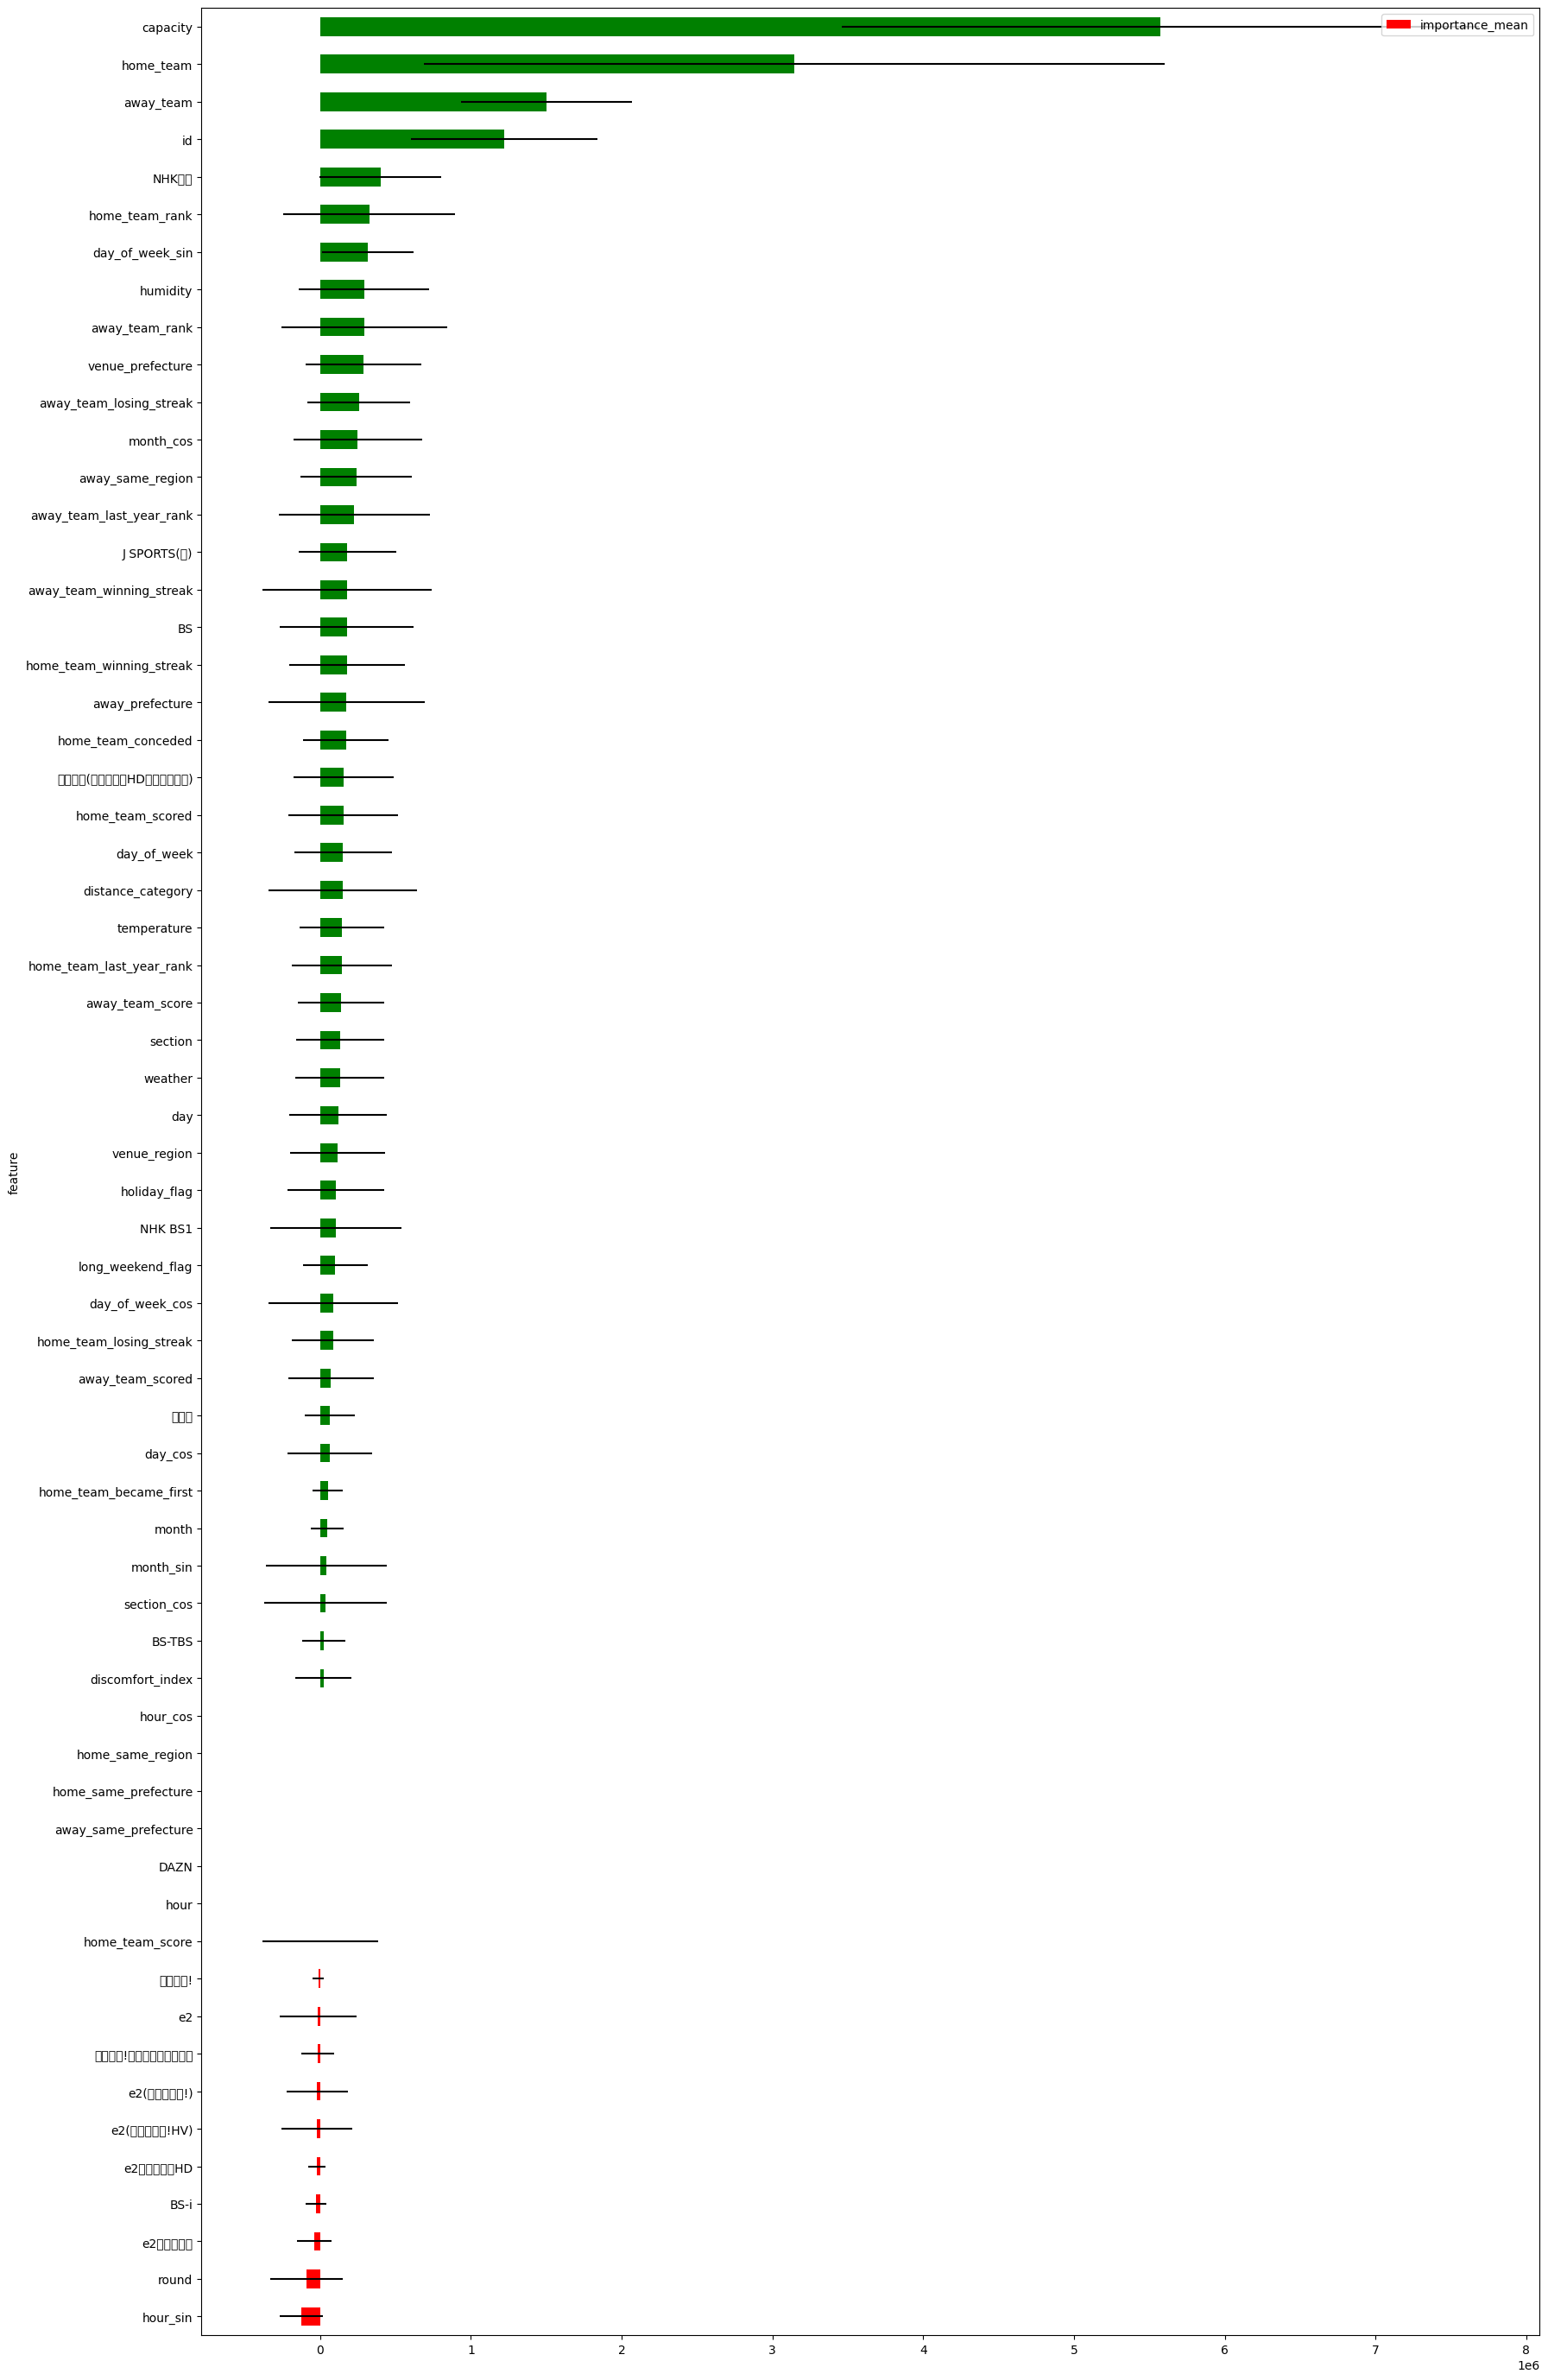

In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from lofo import LOFOImportance, Dataset, plot_importance

train_all = pd.read_csv("train_all.csv")

# define the validation scheme
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# define the binary target and the features
dataset = Dataset(df=train_all, target="attendance", features=[col for col in train_all.columns if col != "attendance"])

# define the validation scheme and scorer. The default model is LightGBM
lofo_imp = LOFOImportance(dataset, cv=cv, scoring="neg_mean_squared_error")

# get the mean and standard deviation of the importances in pandas format
importance_df = lofo_imp.get_importance()

# plot the means and standard deviations of the importances
plot_importance(importance_df, figsize=(20, 35))